<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/foundation/chapter02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 전처리**

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
                
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

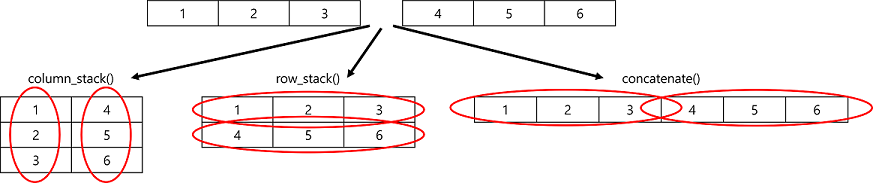

In [2]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


전에는 입력 데이터를 만들 때 파이썬 리스트를 리스트 내포로 for문으로 순회하면서 

원소를 하나씩 꺼내 생선 하나의 길이와 무게를 2차원 리스트를 만들었다.

위의 방법을 넘파이로 사용하면 훨씬 간편하게 만들 수 있다.

넘파이의 column_stack()함수는 전달받은 리스트를 세로로 세운 다음 차례대로 나란히 연결한다.

넘파이의 row_stack()함수는 전달받은 리스트를 가로로 세운 다음 차례대로 나란히 연결한다.


In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


전에는 타깃 데이터를 만들 때 원소가 하나인 리스트 [1], [0]을 여러번 곱해서 타깃 데이터를 만들었다.

위의 방법을 넘파이로 사용하면 훨씬 간편하게 만들 수 있다.

넘파이의 np.ones()와 np.zeros() 함수를 사용하면 각각 원하는 개수의 1과 0을 채운 배열을 만들어 준다.

그 다음 두 배열을 그대로 연결하면 된다. 이때 사용하는 함수가 넘파이의 concatenate() 함수이다.

넘파이의 concatenate()함수는 두 배열을 첫 번째 차원을 따라 연결한다.

---

np.full() 함수는 특정 값이 들어가 있고, 원하는 크기의 배열을 만들어 준다.

ex) np.full((2,3), 9)는 2x3 크기의 9로 채워진 배열을 만들어준다.

*앞에서 말한 함수들은 모두 튜플(tuple)로 전달해야한다.*

# **사이킷런으로 훈련 세트와 테스트 세트 나누기**

전에는 인덱스 배열을 만들어서 랜덤으로 섞은 다음에 배열 인덱싱과 슬라이싱을 이용해서 훈련 세트와 테스트 세트로 나누었다.

사실 사이킷런에는 머신러닝 모델을 위한 알고리즘뿐만 아니라 다양한 유틸리티 도구가 준비되어있다.

역시 훈련 세트와 테스트 세트로 나누는 도구도 이미 준비되어있다.


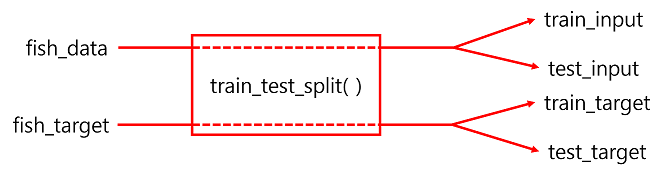

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

사이킷런의 model_selection 모듈 하위에 train_test_split() 함수는 나누고 싶은 리스트나 배열을 원하는 만큼 전달하면 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 준다.

fish_data와 fish_target 두 개의 배열을 train_test_split() 함수에 전달하면 각각 두 개로 나누어진다. 그래서 반환되는 배열이 4개가 반환된다.

만약 세 개의 배열을 train_test_split() 함수에 전달하면 각각 두 개로 나누어져서 6개가 반환될 것이다.

그리고 보통 이 함수는 기본적으로 25%를 테스트 세트로 떼어 냅니다.

---

훈련 데이터가 굉장히 크고, 비교적 클래스가 균등하게 잇으면 적당히 샘플이 골고루 섞여서 훈련 세트와 테스트 세트로 나눠질 것이다.

하지만 훈련 세트가 작거나 특정 클래스의 샘플이 상대적으로 작다면 무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않아서 샘플링 편향이 생길 수도 있다.

stratify라는 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 골고루 섞이도록 훈련 세트와 테스트 세트를 나눠준다.

그래서 분류 문제를 작업할 경우에는 일반적으로 stratify 매개변수를 사용하는 것이 좋다.

stratify라는 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다.


---

무작위 결과를 만드는 random함수들은 실행할 때마다 다른 결과를 만든다.

이전에는 random.seed() 함수를 사용하여 일정한 결과를 얻었다.

random.seed() 함수와 같은 역할을 하는 것이 random_state 매개변수이다.

# **수상한 도미**

길이가 25cm이고 무게가 150g인 도미는 모델은 무엇이라고 예측할까?

In [7]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [8]:
print(kn.predict([[25, 150]]))

[0.]


모델은 빙어라고 예측했습니다.

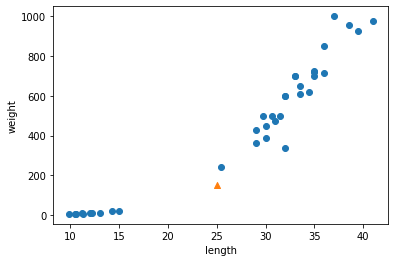

In [9]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

새로운 샘플에 대해 marker 매개변수를 '^'으로 지정하여 삼각형으로 나타냈다.

근데 이 샘플은 오른쪽 위로 뻗어 있는 다른 도미 데이터에 더 가깝다.

왜 이 모델은 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 생각한걸까?

In [10]:
distances, indexes = kn.kneighbors([[25, 150]])

k-최근접 이웃 알고리즘은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용한다.

어떤 이웃을 보고 빙어라고 판단했는지 알아볼 수 있다.

KNeighborsClassifier 클래스는 주어진 샘플의 주변 샘플, 즉, 가장 가까운 이웃을 찾아 주는 kneighbors() 메소드를 제공한다.

이 메소드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환한다.

n_neighbors의 기본 값은 5이므로 5개의 이웃에 대해 거리와 인덱스 번호가 반환될 것이다.

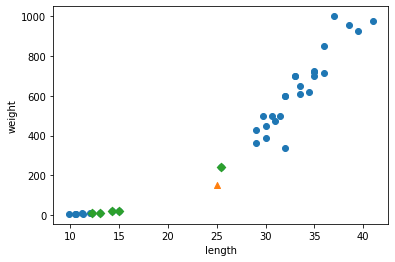

In [11]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

marker='D'로 지정하면 산점도를 마름모로 그린다.

예측 결과와 마찬가지로 가장 가까운 이웃에 도미는 하나밖에 포함되지 않았고, 나머지는 빙어로 포함되었다.

산점도를 보면 직관적으로 도미와 가깝게 보인다.

이유가 무엇일까?

In [12]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [13]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


첫 번째 샘플까지의 거리는 92이고, 그 외 가장 가까운 샘플들은 모두 130, 138이다.

그런데 거리가 92와 130이라고 했을 때 그래프를 보면 거리 비율이 이상하다.

어림짐작으로 보아도 92의 거리보다 족히 몇 배는 되어보이는데 겨우 거리가 130이다.

사실은 x축은 벙뮈가 10 ~ 40으로 좁고, y축은 범위가 0 ~ 1000으로 넓다.

그래서 x축과 y축의 scale이 맞지 않기 때문에 산점도를 보았을 때  직관적으로 도미와 가깝다고 느낀 것이다.

따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산되는 것이고, 이 때문에 오른쪽 위의 도미 샘플이 이웃으로 선택되지 않은 것이다.

# **기준을 맞춰라**

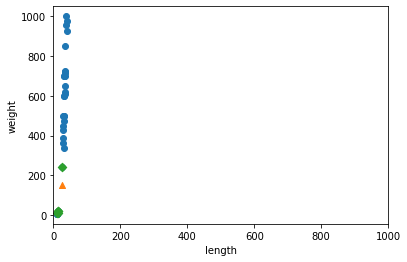

In [14]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

맷플롭릿에 xlim() 함수를 사용하면 x축의 범위를 지정할 수 있다.

x축을 y축과 scale을 동일하게 맞추기 위해서 xlim() 함수에 0 ~ 1000으로 지정해서 산점도를 그렸다.

x축과 y축의 scale을 동일하게 맞추니 모든 데이터가 수직으로 늘어선 형태로 변하였다

결국 생선을 구분할 때 생선의 길이보다 생선의 무게가 큰 영향을 끼친다는 것을 알 수 있다.

x축과 y축, 두 특성(길이와 무게) 간의 scale이 다르다. 즉, 값이 놓인 범위가 매우 다르다.

이럴 경우 k-최근접 이웃 알고리즘은 가장 가까운 거리에 있는 주변 샘플을 찾기 때문에 특성의 scale이 다르면 문제가 생긴다.

scale이 큰 특성에 절대적으로 영향을 받기 때문에, 생선의 길이가 역할을 못하고 무게로만 주변 샘플을 찾는 문제가 생긴 것이다.

k-최근접 이웃 알고리즘뿐만아니라 거리 기반 알고리즘들도 마찬가지이다.

그래서 이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 두 특성의 scale을 공존하게 맞춰주는 작업이 필요하다.

scale을 맞춘다는 것은 두 특성값을 일정한 기준으로 맞춰준다는 것이다.

이런 작업을 데이터 전처리(data preprocessing)이라고 부른다.

# **표준 점수**

데이터 전처리 방법 중 가장 널리 사용되는 방법이 표준점수이다.

표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다.

이를 통해 실제 특성 값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

***표준점수 = (특성값 - 평균) / 표준편차***

---

※ 여기서 잠깐!! ※

분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구한다.

표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타낸다.

표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값이다.

In [16]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


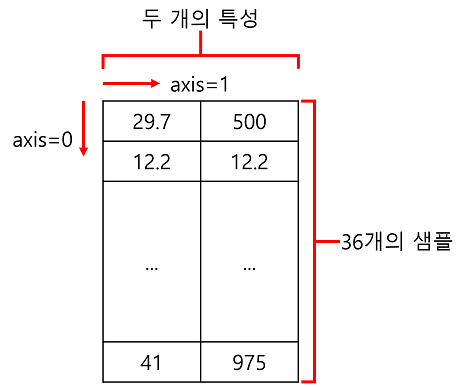

우선 특성에 대한 평균과 표준편차를 구해야한다.

넘파이의 np.mean() 함수는 평균을 계산한다.

넘파이의 np.std() 함수는 표준편차를 계산한다.

mean() 함수와 std() 함수에 변환하고자 하는 배열을 전달하고, 우리는 각 특성마다 평균과 표준편차가 필요하므로 axis(축)을 0으로 설정한다.

---

axis을 0으로 설정하면 위의 이미지처럼 행을 따라서 각 열의 평균과 표준편차가 계산된다.

계산 후에는 두 개의 특성이 있으므로 (1, 2) 크기의 배열이 생성된다.

---

axis을 1으로 설정하면 위의 이미지처럼 열을 따라서 각 행의 평균과 표준편차가 계산된다.

계산 후에는 36개의 샘플이 있으므로 (36, 1) 크기의 배열이 생성된다.

In [18]:
train_scaled = (train_input - mean) / std

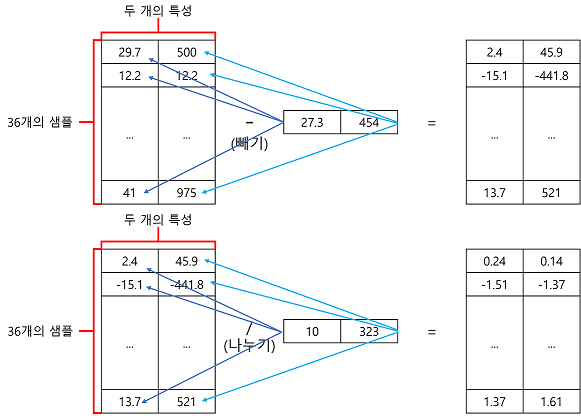

각 특성마다 평균과 표준편차를 구했으므로, 이제 각 특성값에서 평균을 빼고, 표준편차로 나누어서 표준점수로 변환하면된다.

---

넘파이는 (1, 2) 배열을 각 모든 행에 적용하여 값을 구한다.

train_input의 모든 행에서 mean에 있는 두 평균 값을 빼준다.

그 다음 std에 있는 두 표준편차를 다시 모든 행에 나눈다.

이런 넘파이 기능을 브로드캐스팅(broadcasting)이라고 한다. -> 브로드 캐스팅은 넘파이 배열 사이에서 일어난다.

# **전처리한 데이터로 모델 훈련하기**



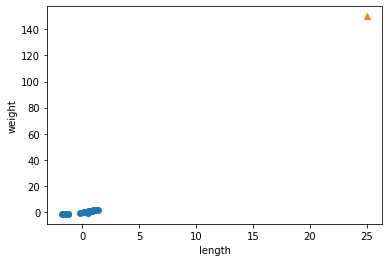

In [19]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

새로운 샘플만 덩그러니 떨어져 있다.

왜냐하면 훈련 세트를 표준점수로 바꿨기 때문에 새로운 샘플[20, 150]도 똑같이 표준점수로 변환해줘야한다.

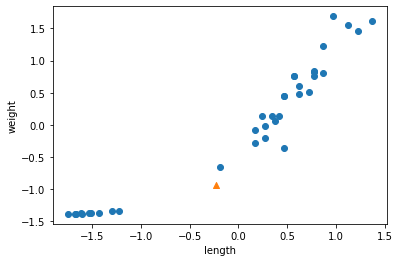

In [20]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

주의할 점은 새로운 샘플을 변환할 때 훈련 세트의 기준으로 변환해야 한다.

훈련 세트에서 입력 데이터를 변환해서 훈련을 하면 그 모델을 다시 사용하기 위해서는 그 모델을 사용하려는 다른 데이터도 훈련 세트의 기준으로 변환해야 스케일이 같아진다.

훈련 세트의 평균과 표준편차로 변환하니 같은 스케일로 산점도를 그렸다.

In [21]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

훈련 후 모델을 테스트 세트로 평가할 때도 마찬가지로 테스트 세트 또한 훈련 세트의 기준으로 변환해야한다.

In [22]:
print(kn.predict([new]))

[1.]


앞에서는 이 새로운 생선 데이터, 길이가 25cm이고 무게가 150g인 도미를 빙어라고 예측했다. 

이제는 제대로 도미라고 출력한다.

그러면 이번에는 어떻게 도미라고 예측했는지 확인해보자.

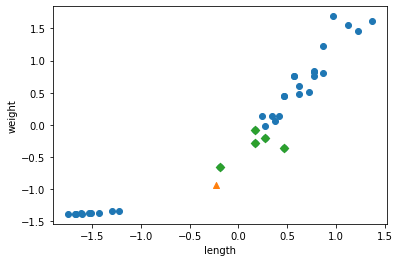

In [23]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

특성을 스케일을 해서 표준점수로 바꾸어기 때문에 k-최근접 이웃 알고리즘이 올바르게 거리를 측정했다.

가장 가까운 샘플은 모두 도미로 바뀌었다.

따라서 이 새로운 샘플을 도미라고 예측한 것이다.